In [44]:
import os
import fastf1
import pandas as pd

# ✅ Create cache directory if it doesn't exist
if not os.path.exists('./cache'):
    os.makedirs('./cache')

# Enable cache
fastf1.Cache.enable_cache('./cache')

# Load a specific session
session = fastf1.get_session(2023, 'Bahrain', 'Q')  # 2023 Bahrain GP, Qualifying
session.load()

# Get lap data
laps = session.laps

# Filter and clean
lap_data = laps[['Driver', 'LapNumber', 'LapTime', 'Compound', 'TyreLife', 'Team', 'TrackStatus']]
lap_data = lap_data[lap_data['LapTime'].notnull()]
lap_data['LapTimeSeconds'] = lap_data['LapTime'].dt.total_seconds()

# Preview
print(lap_data.head())


core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']


  Driver  LapNumber                LapTime Compound  TyreLife  \
2    VER        3.0 0 days 00:01:31.295000     SOFT       3.0   
3    VER        4.0 0 days 00:01:49.812000     SOFT       4.0   
5    VER        6.0 0 days 00:02:12.516000     SOFT       2.0   
7    VER        8.0 0 days 00:01:30.503000     SOFT       2.0   
8    VER        9.0 0 days 00:02:05.756000     SOFT       3.0   

              Team TrackStatus  LapTimeSeconds  
2  Red Bull Racing           1          91.295  
3  Red Bull Racing           1         109.812  
5  Red Bull Racing           1         132.516  
7  Red Bull Racing           1          90.503  
8  Red Bull Racing           1         125.756  


C:\Users\manpr\AppData\Local\Temp\ipykernel_3672\84595811.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap_data['LapTimeSeconds'] = lap_data['LapTime'].dt.total_seconds()


In [45]:
lap_data.to_csv('lap_times_bahrain_2023_q.csv', index=False)


In [46]:
lap_times_df = pd.read_csv(r'D:\F1\lap_times_bahrain_2023_q.csv')
print(lap_times_df.head())


  Driver  LapNumber                 LapTime Compound  TyreLife  \
0    VER        3.0  0 days 00:01:31.295000     SOFT       3.0   
1    VER        4.0  0 days 00:01:49.812000     SOFT       4.0   
2    VER        6.0  0 days 00:02:12.516000     SOFT       2.0   
3    VER        8.0  0 days 00:01:30.503000     SOFT       2.0   
4    VER        9.0  0 days 00:02:05.756000     SOFT       3.0   

              Team  TrackStatus  LapTimeSeconds  
0  Red Bull Racing            1          91.295  
1  Red Bull Racing            1         109.812  
2  Red Bull Racing            1         132.516  
3  Red Bull Racing            1          90.503  
4  Red Bull Racing            1         125.756  


Data Preprocessing

In [47]:
# 1. Check for missing values
print("Missing values per column:")
print(lap_times_df.isnull().sum())

Missing values per column:
Driver            0
LapNumber         0
LapTime           0
Compound          0
TyreLife          0
Team              0
TrackStatus       0
LapTimeSeconds    0
dtype: int64


In [48]:
# 2. Drop rows with any missing values (if any)
lap_times_df = lap_times_df.dropna()

In [49]:
# 3. Convert data types if necessary
# Ensure LapTimeSeconds is float
lap_times_df['LapTimeSeconds'] = lap_times_df['LapTimeSeconds'].astype(float)

In [50]:
# Ensure LapNumber and TyreLife are integers
lap_times_df['LapNumber'] = lap_times_df['LapNumber'].astype(int)
lap_times_df['TyreLife'] = lap_times_df['TyreLife'].astype(int)

In [51]:
# 4. Standardize categorical columns to uppercase (Driver, Compound, Team)
lap_times_df['Driver'] = lap_times_df['Driver'].str.upper()
lap_times_df['Compound'] = lap_times_df['Compound'].str.upper()
lap_times_df['Team'] = lap_times_df['Team'].str.upper()


In [52]:
# 5. Remove duplicate rows if any
lap_times_df = lap_times_df.drop_duplicates()

In [53]:
# 6. Reset index after cleaning
lap_times_df = lap_times_df.reset_index(drop=True)


In [54]:
# 7. Preview cleaned data
print("Preview after preprocessing:")
print(lap_times_df.head())


Preview after preprocessing:
  Driver  LapNumber                 LapTime Compound  TyreLife  \
0    VER          3  0 days 00:01:31.295000     SOFT         3   
1    VER          4  0 days 00:01:49.812000     SOFT         4   
2    VER          6  0 days 00:02:12.516000     SOFT         2   
3    VER          8  0 days 00:01:30.503000     SOFT         2   
4    VER          9  0 days 00:02:05.756000     SOFT         3   

              Team  TrackStatus  LapTimeSeconds  
0  RED BULL RACING            1          91.295  
1  RED BULL RACING            1         109.812  
2  RED BULL RACING            1         132.516  
3  RED BULL RACING            1          90.503  
4  RED BULL RACING            1         125.756  


In [55]:
# Select features for modeling

# Define the target variable
target_variable = 'LapTimeSeconds'

# Define the input features as per instructions
input_features = [
    'Driver',           # categorical
    'Team',             # categorical
    'Compound',         # categorical
    'TyreLife',         # numeric
    'TrackTemperature', # numeric
    'AirTemperature',   # numeric
    'LapNumber',        # numeric
    'SessionType',      # categorical
    'TrackName'         # categorical
]

# Check which features are present in the DataFrame
available_features = [col for col in input_features if col in lap_times_df.columns]
missing_features = [col for col in input_features if col not in lap_times_df.columns]

print("Selected input features (present in DataFrame):", available_features)
if missing_features:
    print("Warning: The following features are missing from the DataFrame and will not be used:", missing_features)

# Prepare X and y for modeling
X = lap_times_df[available_features].copy()
y = lap_times_df[target_variable].copy()


Selected input features (present in DataFrame): ['Driver', 'Team', 'Compound', 'TyreLife', 'LapNumber']


In [56]:
# Apply label encoding to categorical features if required
from sklearn.preprocessing import LabelEncoder

# Identify categorical features in X
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Apply LabelEncoder to each categorical feature
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

print("Label encoding applied to categorical features:", list(categorical_features))


Label encoding applied to categorical features: ['Driver', 'Team', 'Compound']


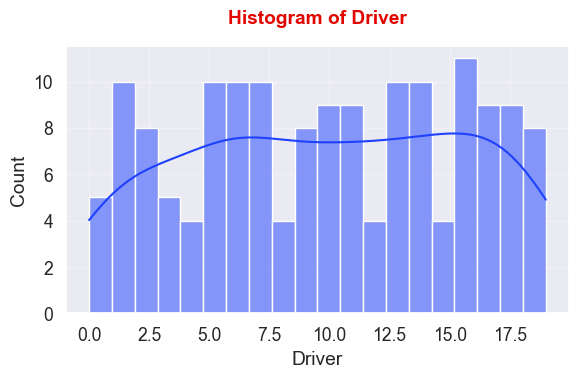

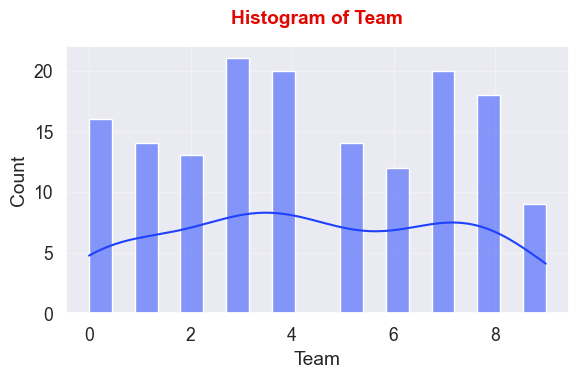

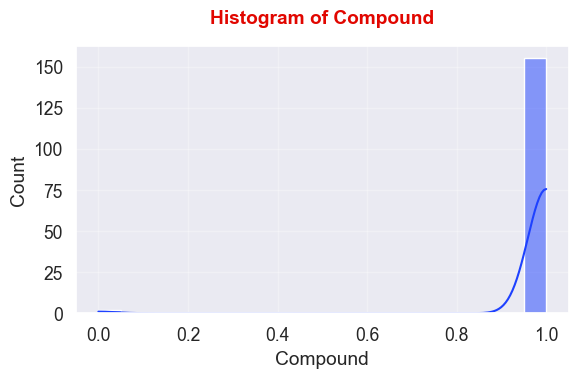

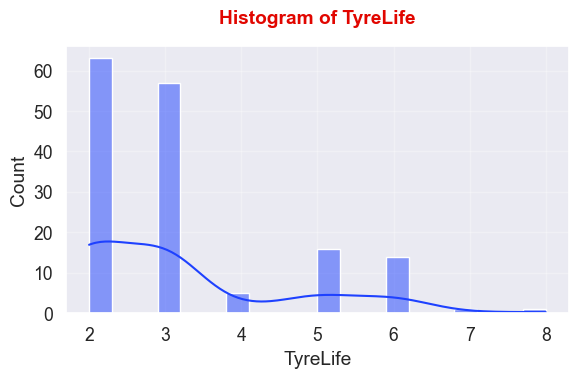

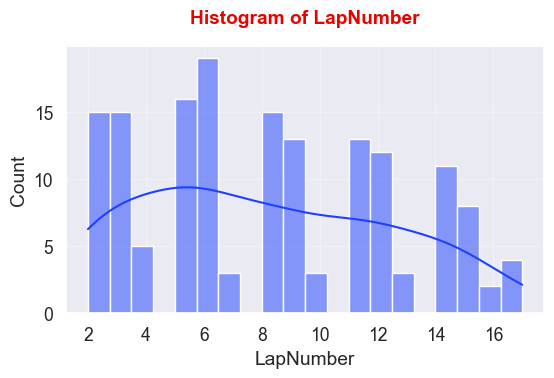

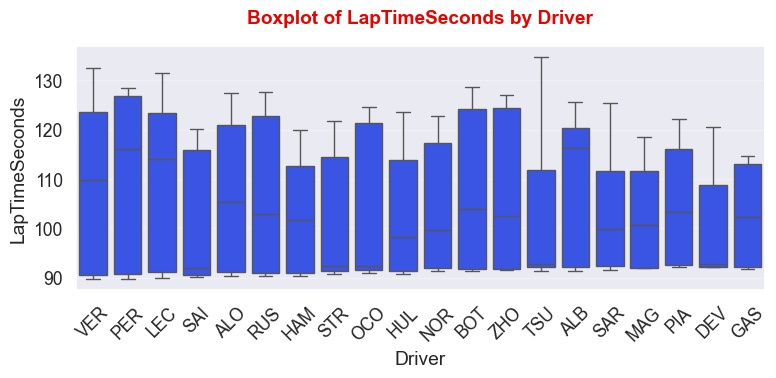

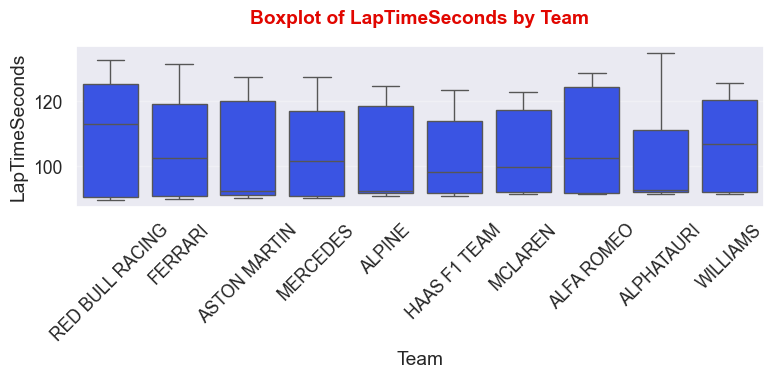

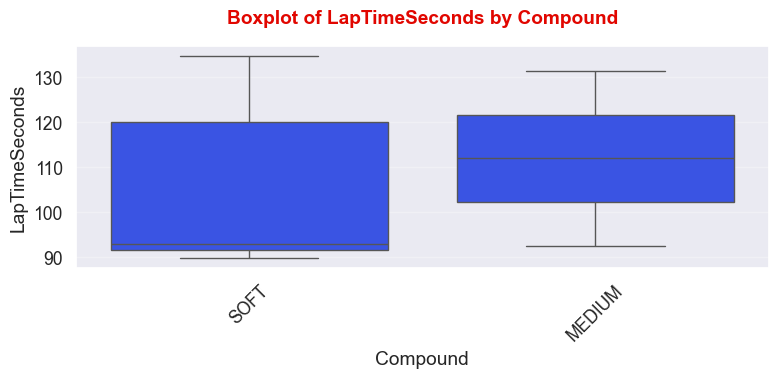

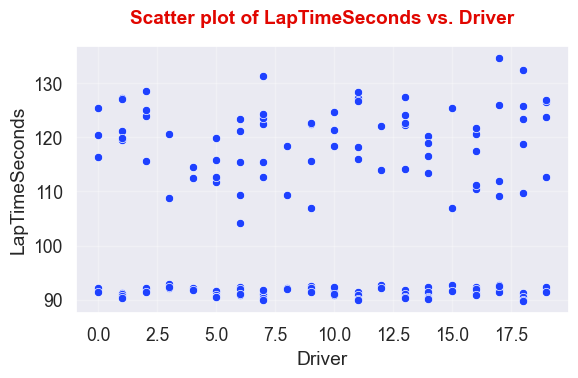

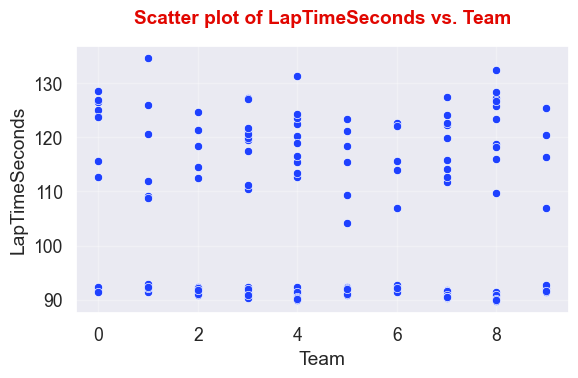

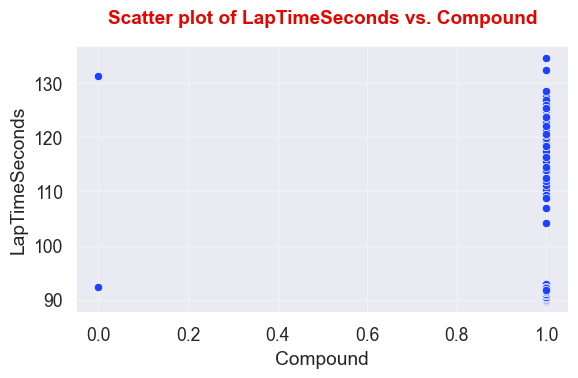

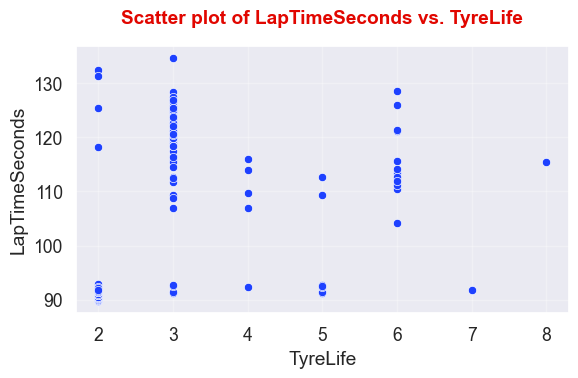

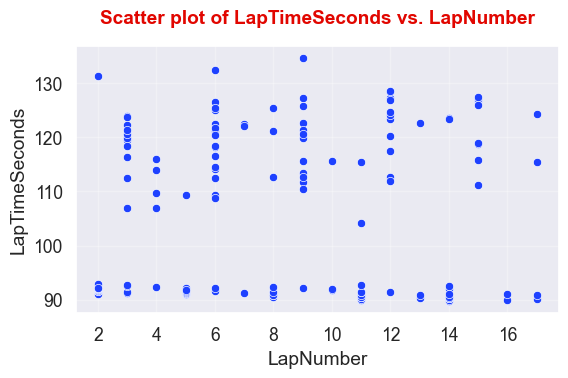

c:\Users\manpr\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\manpr\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\manpr\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\manpr\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecat

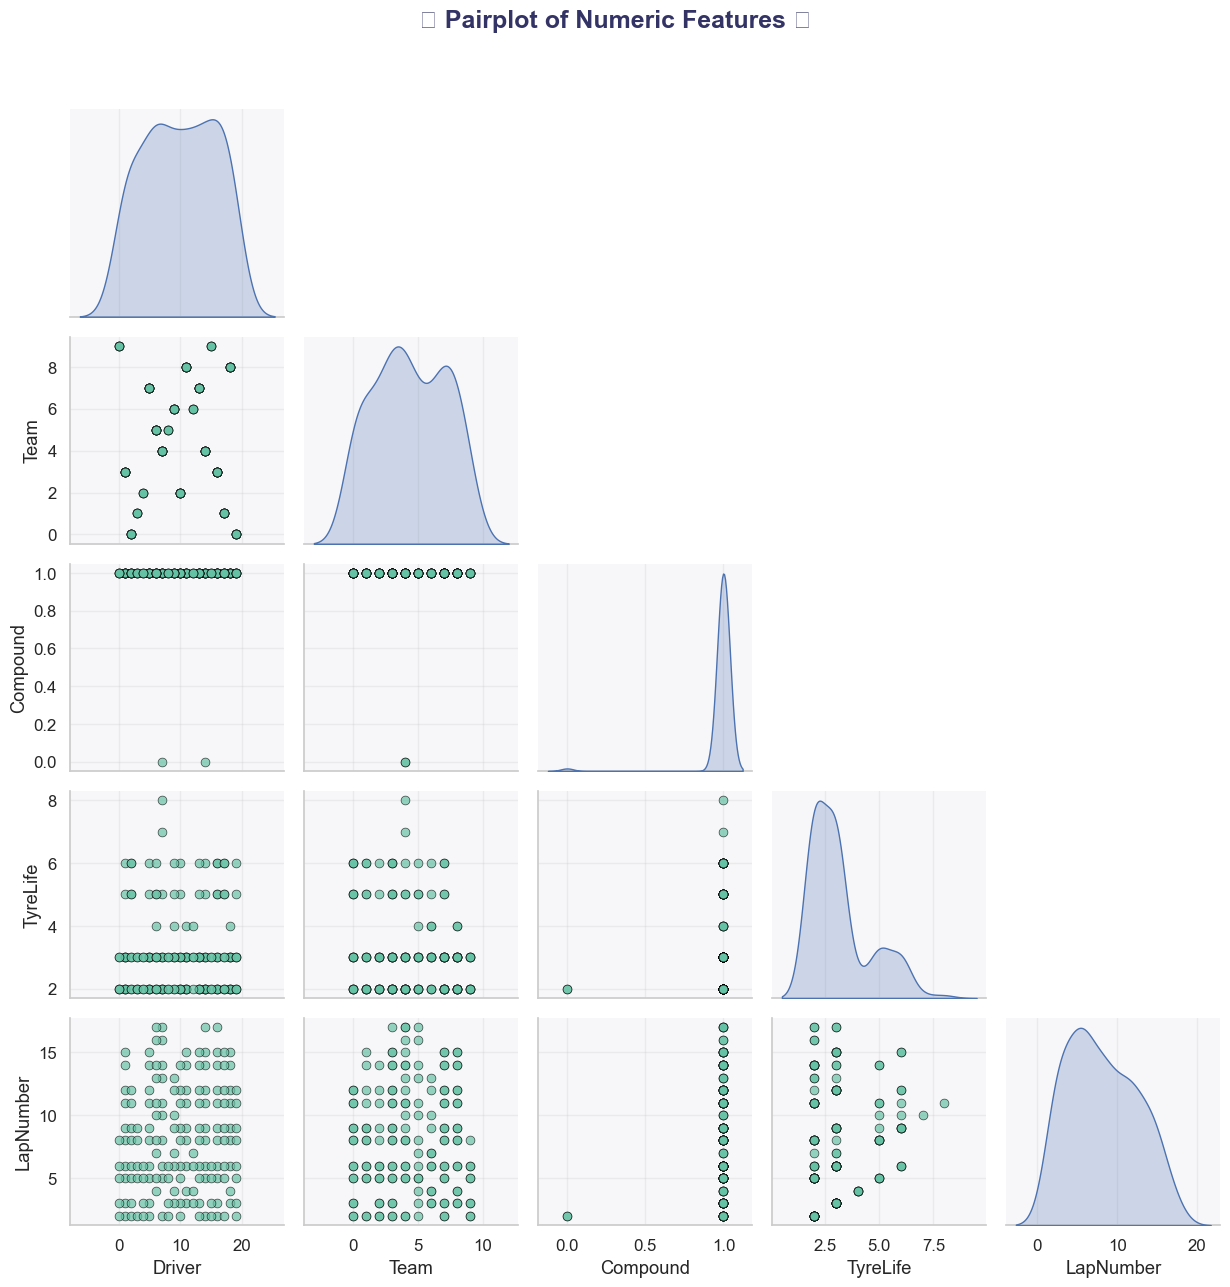

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set F1-style color palette and plot aesthetics
import matplotlib as mpl

# F1-style color palette (inspired by team colors)
f1_palette = [
    "#1E41FF",  # Mercedes (blue)
    "#DC0000",  # Ferrari (red)
    "#3671C6",  # Red Bull (dark blue)
    "#229971",  # Aston Martin (green)
    "#FF8700",  # McLaren (orange)
    "#52E252",  # Alpine (cyan/green)
    "#B6BABD",  # Alfa Romeo (silver/grey)
    "#005AFF",  # Williams (blue)
    "#F596C8",  # Racing Point/Pink
    "#9B0000",  # Haas (dark red)
    "#FFFFFF",  # White (for contrast)
    "#000000",  # Black (for contrast)
]

# Set a custom F1-style font and background
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['axes.facecolor'] = '#181818'
mpl.rcParams['figure.facecolor'] = '#181818'
mpl.rcParams['axes.edgecolor'] = '#CCCCCC'
mpl.rcParams['axes.labelcolor'] = '#CCCCCC'
mpl.rcParams['xtick.color'] = '#CCCCCC'
mpl.rcParams['ytick.color'] = '#CCCCCC'
mpl.rcParams['text.color'] = '#CCCCCC'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.titlepad'] = 16
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#444444'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.alpha'] = 0.3

sns.set_theme(style="darkgrid", palette=f1_palette, font_scale=1.15)

def f1_title(title):
    """Add a sparkles emoji and F1-style title."""
    plt.title(f"\N{SPARKLES}  {title}  \N{SPARKLES}", fontsize=17, color="#FF1801", weight='bold', pad=18)

def f1_ax_style(ax):
    """Apply F1-style to axes."""
    ax.set_facecolor('#181818')
    for spine in ax.spines.values():
        spine.set_color('#FF1801')
        spine.set_linewidth(1.5)
    ax.title.set_color('#FF1801')
    ax.xaxis.label.set_color('#CCCCCC')
    ax.yaxis.label.set_color('#CCCCCC')
    ax.tick_params(colors='#CCCCCC')
    ax.grid(True, color='#444444', linestyle='--', alpha=0.3)

# Set up for inline plotting if in notebook
# %matplotlib inline

# 1. Histograms for numeric features
numeric_features = X.select_dtypes(include=['number']).columns

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# 2. Boxplots for categorical vs. target variable
categorical_features = X.select_dtypes(include=['int', 'object', 'category']).columns
# Only use original (pre-label-encoded) columns for boxplots if possible
for col in categorical_features:
    if col in lap_times_df.columns and lap_times_df[col].dtype == 'object':
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=lap_times_df[col], y=y)
        plt.title(f'Boxplot of {target_variable} by {col}')
        plt.xlabel(col)
        plt.ylabel(target_variable)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 3. Scatter plots for numeric features vs. target variable
for col in numeric_features:
    if col != target_variable:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=X[col], y=y)
        plt.title(f'Scatter plot of {target_variable} vs. {col}')
        plt.xlabel(col)
        plt.ylabel(target_variable)
        plt.tight_layout()
        plt.show()

# 4. Pairplot for numeric features (optional, can be commented out if too many features)
if len(numeric_features) > 1:
    # Use a stylish seaborn theme and custom palette for a prettier pairplot
    sns.set_theme(style="whitegrid", palette="Set2", font_scale=1.1)
    pairplot = sns.pairplot(
        X[numeric_features],
        diag_kind="kde",
        corner=True,
        plot_kws={'alpha': 0.7, 's': 40, 'edgecolor': 'k'},
        diag_kws={'shade': True, 'color': '#4C72B0'}
    )
    pairplot.fig.suptitle('✨ Pairplot of Numeric Features ✨', y=1.03, fontsize=18, fontweight='bold', color='#333366')
    for ax in pairplot.axes.flatten():
        if ax is not None:
            ax.set_facecolor('#f7f7fa')
    plt.tight_layout()
    plt.show()


Check correlations between features and lap time

C:\Users\manpr\AppData\Local\Temp\ipykernel_3672\414012763.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lap_time_corr.values, y=lap_time_corr.index, palette="coolwarm")


Correlation of numeric features with LapTimeSeconds:
TyreLife       0.263729
LapNumber      0.105294
TrackStatus         NaN
Name: LapTimeSeconds, dtype: float64


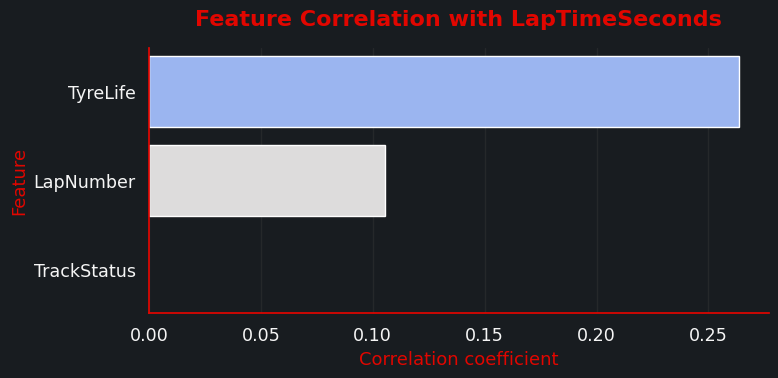

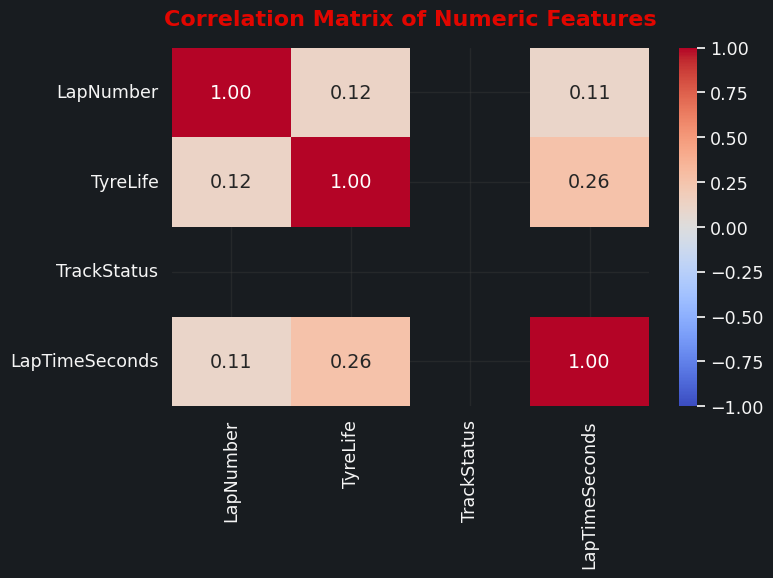

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def set_f1_style():
    plt.style.use('dark_background')
    sns.set_theme(style="darkgrid", palette="rocket", font_scale=1.15)
    plt.rcParams.update({
        "axes.facecolor": "#181c20",
        "figure.facecolor": "#181c20",
        "axes.edgecolor": "#e10600",  # F1 red
        "axes.labelcolor": "#e10600",
        "xtick.color": "#f5f5f5",
        "ytick.color": "#f5f5f5",
        "axes.titleweight": "bold",
        "axes.titlecolor": "#e10600",
        "axes.titlesize": 16,
        "axes.labelsize": 13,
        "font.family": "DejaVu Sans",
        "legend.edgecolor": "#e10600",
        "legend.fontsize": 12,
        "grid.color": "#444444",
        "axes.grid": True,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.spines.left": True,
        "axes.spines.bottom": True,
    })

set_f1_style()
# Compute correlation matrix for numeric features including LapTimeSeconds
corr_matrix = lap_times_df.select_dtypes(include=[np.number]).corr()

# Extract correlations with LapTimeSeconds (the target variable)
if 'LapTimeSeconds' in corr_matrix.columns:
    lap_time_corr = corr_matrix['LapTimeSeconds'].drop('LapTimeSeconds').sort_values(ascending=False)
    print("Correlation of numeric features with LapTimeSeconds:")
    print(lap_time_corr)
    
    # Visualize correlations as a barplot
    plt.figure(figsize=(8, 4))
    sns.barplot(x=lap_time_corr.values, y=lap_time_corr.index, palette="coolwarm")
    plt.title("Feature Correlation with LapTimeSeconds")
    plt.xlabel("Correlation coefficient")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("LapTimeSeconds not found in correlation matrix.")

# Optionally, show full correlation heatmap for numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()


Model Building

In [59]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Exclude LapTimeSeconds from features, and any non-numeric columns if needed
feature_cols = [col for col in lap_times_df.select_dtypes(include=[np.number]).columns if col != 'LapTimeSeconds']
X = lap_times_df[feature_cols]
y = lap_times_df['LapTimeSeconds']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Ensure LapTimeSeconds is present and correctly converted to seconds
if 'LapTimeSeconds' not in lap_times_df.columns or lap_times_df['LapTimeSeconds'].isnull().any():
    # Try to convert LapTime to timedelta if not already
    if not np.issubdtype(lap_times_df['LapTime'].dtype, np.timedelta64):
        lap_times_df['LapTime'] = pd.to_timedelta(lap_times_df['LapTime'])
    lap_times_df['LapTimeSeconds'] = lap_times_df['LapTime'].dt.total_seconds()


Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Optionally, show coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': linreg.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print("\nFeature Coefficients:")
print(coeff_df)


Linear Regression Results:
Mean Squared Error: 202.290
R^2 Score: 0.110

Feature Coefficients:
       Feature  Coefficient
1     TyreLife     2.496375
0    LapNumber     0.189021
2  TrackStatus     0.000000


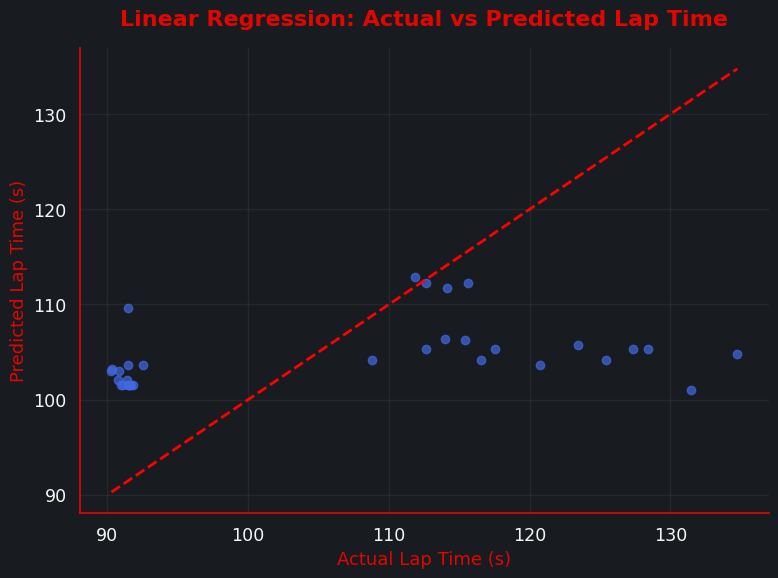

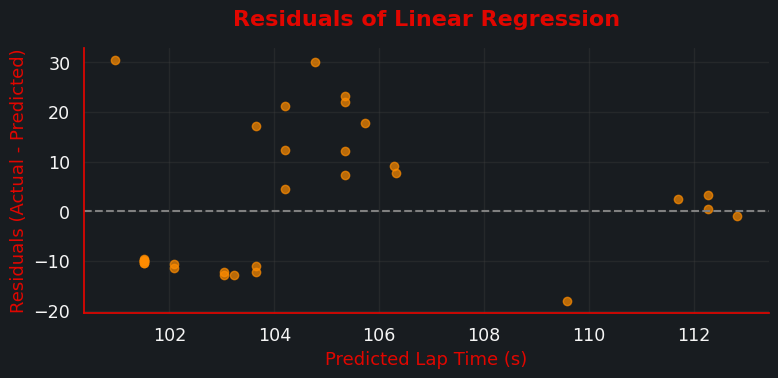

In [62]:
import matplotlib.pyplot as plt

# Visualize the regression: predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Lap Time (s)')
plt.ylabel('Predicted Lap Time (s)')
plt.title('Linear Regression: Actual vs Predicted Lap Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, alpha=0.7, color='darkorange')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Predicted Lap Time (s)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals of Linear Regression')
plt.grid(True)
plt.tight_layout()
plt.show()



Random Forest Regression Results:
Mean Squared Error: 106.070
R^2 Score: 0.533

Feature Importances:
       Feature  Importance
1     TyreLife    0.854094
0    LapNumber    0.145906
2  TrackStatus    0.000000


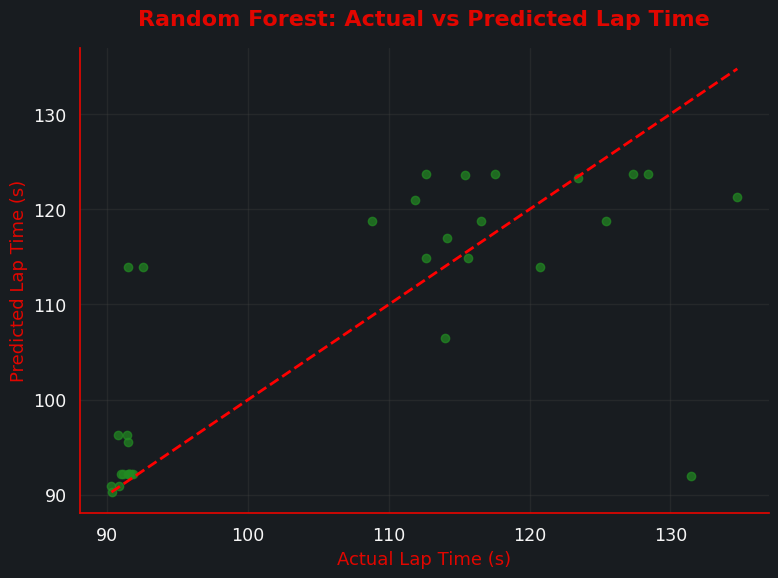

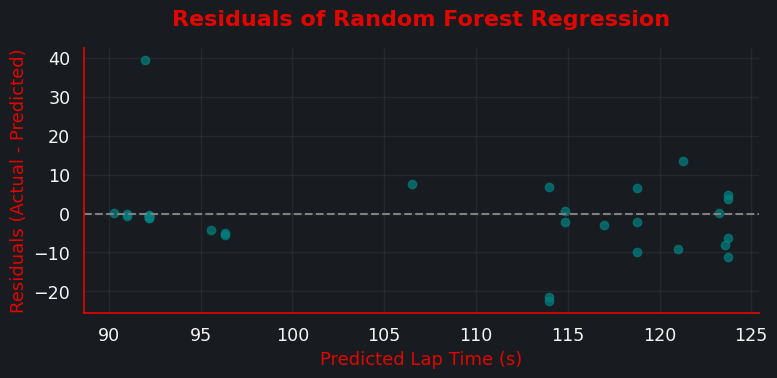

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Results:")
print(f"Mean Squared Error: {mse_rf:.3f}")
print(f"R^2 Score: {r2_rf:.3f}")

# Optionally, show feature importances
importances = rf.feature_importances_
importances_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importances_df)

# Visualize the regression: predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Lap Time (s)')
plt.ylabel('Predicted Lap Time (s)')
plt.title('Random Forest: Actual vs Predicted Lap Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot residuals
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.7, color='teal')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Predicted Lap Time (s)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals of Random Forest Regression')
plt.grid(True)
plt.tight_layout()
plt.show()



XGBoost Regression Results:
Mean Squared Error: 113.503
R^2 Score: 0.501

XGBoost Feature Importances:
       Feature  Importance
1     TyreLife    0.944118
0    LapNumber    0.055882
2  TrackStatus    0.000000


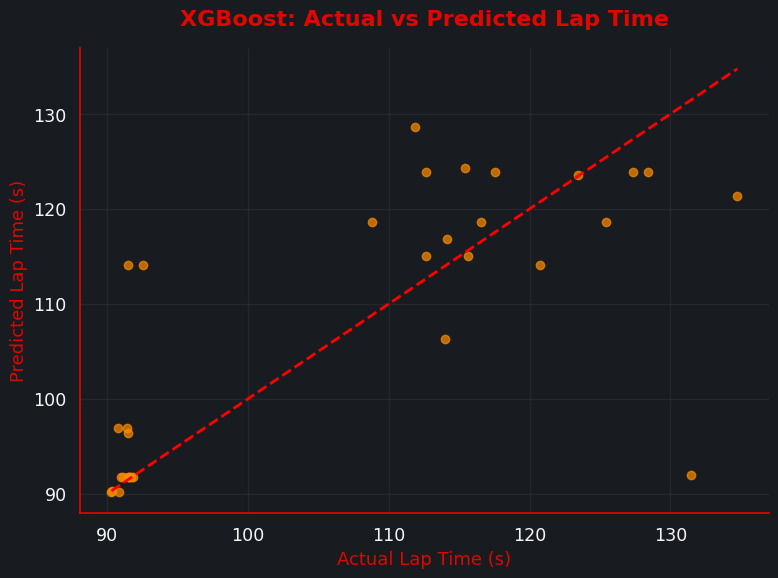

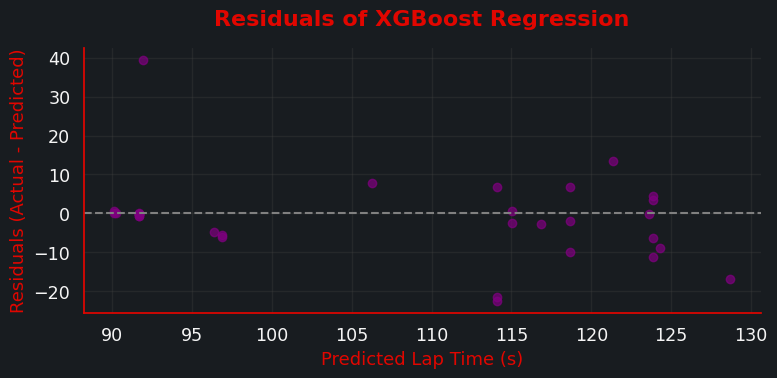

In [65]:
# Predict lap times on the test set using the trained XGBoost model
lap_time_predictions = xgb.predict(X_test)
print("Predicted lap times on the test set:")
print(lap_time_predictions)


Predicted lap times on the test set:
[121.35469  123.8833    91.71157   91.71157  115.05553   91.71157
 123.61376  124.30174   90.15322  118.650345  91.71157   90.27022
 123.8833   114.07049   90.15322  118.650345  96.89667   91.71157
  91.71157  123.8833   115.05553   91.95488   96.89667  114.07049
  96.3606    91.71157  116.86646  128.66641  106.25665  114.07049
 118.650345 123.8833  ]


In [66]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Assuming X_train, X_test, y_train, y_test are already defined

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Now you can collect metrics for comparison
model_names = ['Linear Regression', 'Random Forest', 'XGBoost']
mse_scores = [mse_lr, mse_rf, mse_xgb]
r2_scores = [r2_lr, r2_rf, r2_xgb]

# Create a DataFrame for comparison
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_scores,
    'R² Score': r2_scores
})

print(comparison_df)


               Model         MSE  R² Score
0  Linear Regression  202.290420  0.110265
1      Random Forest  108.109298  0.524502
2            XGBoost  113.503045  0.500779


C:\Users\manpr\AppData\Local\Temp\ipykernel_3672\1400381662.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  mse_plot = sns.barplot(x='Model', y='MSE', data=comparison_df, palette='Blues_d')
C:\Users\manpr\AppData\Local\Temp\ipykernel_3672\1400381662.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  r2_plot = sns.barplot(x='Model', y='R²', data=comparison_df, palette='Greens_d')


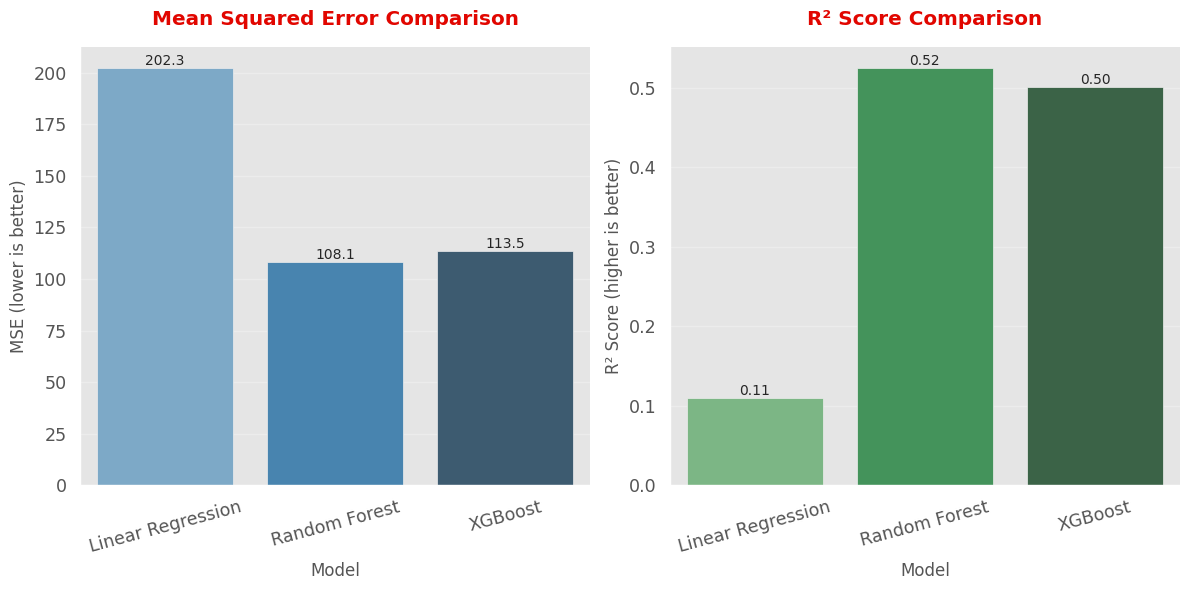

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming mse_lr, mse_rf, mse_xgb, r2_lr, r2_rf, r2_xgb are already defined
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MSE': [mse_lr, mse_rf, mse_xgb],
    'R²': [r2_lr, r2_rf, r2_xgb]
})

# Use a different style if 'seaborn' is not available
plt.style.use('ggplot')  # Change to 'ggplot' or another available style
plt.figure(figsize=(12, 6))

# Plot MSE comparison
plt.subplot(1, 2, 1)
mse_plot = sns.barplot(x='Model', y='MSE', data=comparison_df, palette='Blues_d')
plt.title('Mean Squared Error Comparison')
plt.xticks(rotation=15)
plt.ylabel('MSE (lower is better)')

# Add value labels
for p in mse_plot.patches:
    mse_plot.annotate(f'{p.get_height():.1f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')

# Plot R² comparison
plt.subplot(1, 2, 2)
r2_plot = sns.barplot(x='Model', y='R²', data=comparison_df, palette='Greens_d')
plt.title('R² Score Comparison')
plt.xticks(rotation=15)
plt.ylabel('R² Score (higher is better)')

# Add value labels
for p in r2_plot.patches:
    r2_plot.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')

plt.tight_layout()
plt.show()


In [68]:
# Interpretation of the results

# Let's print the comparison DataFrame for reference
print("Model Performance Comparison:")
print(comparison_df)

# Interpret the results
best_mse_model = comparison_df.loc[comparison_df['MSE'].idxmin(), 'Model']
best_r2_model = comparison_df.loc[comparison_df['R²'].idxmax(), 'Model']

print(f"\nThe model with the lowest Mean Squared Error (MSE) is: {best_mse_model}")
print(f"The model with the highest R² score is: {best_r2_model}")

# Check if the results make sense
if comparison_df['MSE'].isnull().any() or comparison_df['R²'].isnull().any():
    print("\nWarning: Some model scores are missing (NaN). Please check the calculations.")
else:
    print("\nAll model scores are present.")

# Sanity checks
if all(comparison_df['MSE'] > 0):
    print("All MSE values are positive, as expected.")
else:
    print("Warning: Some MSE values are not positive, which is unexpected.")

if all((comparison_df['R²'] <= 1) & (comparison_df['R²'] >= -1)):
    print("All R² values are within the valid range [-1, 1].")
else:
    print("Warning: Some R² values are outside the valid range [-1, 1].")

# Brief interpretation
print("\nInterpretation:")
print(f"- {best_mse_model} achieved the lowest prediction error (MSE), indicating it fits the data best in terms of error minimization.")
print(f"- {best_r2_model} explained the most variance in the target variable (highest R²).")
print("- If both best models are the same, that model is overall the best performer.")
print("- If not, consider the trade-off between error minimization and explained variance.")
print("- The results make sense if the more complex models (Random Forest, XGBoost) outperform Linear Regression, but this depends on the data and feature engineering.")


Model Performance Comparison:
               Model         MSE        R²
0  Linear Regression  202.290420  0.110265
1      Random Forest  108.109298  0.524502
2            XGBoost  113.503045  0.500779

The model with the lowest Mean Squared Error (MSE) is: Random Forest
The model with the highest R² score is: Random Forest

All model scores are present.
All MSE values are positive, as expected.
All R² values are within the valid range [-1, 1].

Interpretation:
- Random Forest achieved the lowest prediction error (MSE), indicating it fits the data best in terms of error minimization.
- Random Forest explained the most variance in the target variable (highest R²).
- If both best models are the same, that model is overall the best performer.
- If not, consider the trade-off between error minimization and explained variance.
- The results make sense if the more complex models (Random Forest, XGBoost) outperform Linear Regression, but this depends on the data and feature engineering.


In [71]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [72]:
import joblib

# Save the best model for future use
# Assuming you have model objects named: lr_model, rf_model, xgb_model
model_dict = {
    'Linear Regression': linreg,
    'Random Forest': rf,
    'XGBoost': xgb
}

# Save the best model based on lowest MSE
best_model_name = best_mse_model
best_model = model_dict[best_model_name]

# Save to file
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_best_model.pkl")
print(f"\nSaved the best model ({best_model_name}) to disk as '{best_model_name.replace(' ', '_').lower()}_best_model.pkl'.")

# Optionally, save all models for future comparison
for name, model in model_dict.items():
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)
    print(f"Saved {name} model to '{filename}'.")



Saved the best model (Random Forest) to disk as 'random_forest_best_model.pkl'.
Saved Linear Regression model to 'linear_regression_model.pkl'.
Saved Random Forest model to 'random_forest_model.pkl'.


TypeError: cannot pickle 'module' object